In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

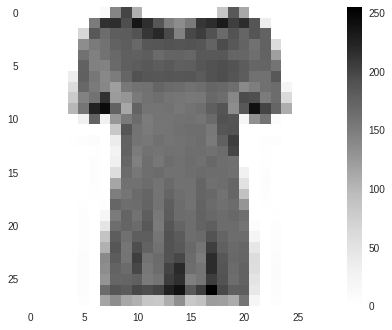

In [17]:
plt.figure
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

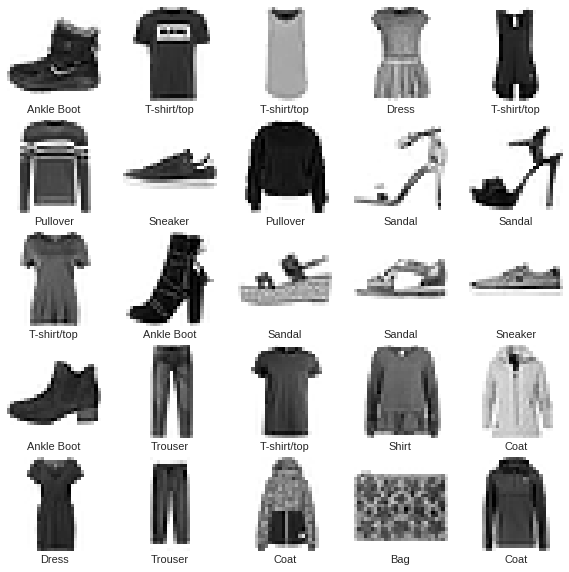

In [19]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation = tf.nn.relu),
                         keras.layers.Dense(10, activation = tf.nn.softmax)])

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.4983 - acc: 0.8264
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3790 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.3405 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3131 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.2953 - acc: 0.8921


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/step
Test accuracy: 0.8668


In [0]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([3.0441477e-06, 1.2353773e-07, 1.3629677e-06, 1.2035342e-06,
       4.3531671e-07, 3.2366116e-03, 9.7427483e-06, 1.4044024e-02,
       3.6148303e-05, 9.8266727e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
img = test_images[0]
print(img.shape)

(28, 28)


In [0]:
img = (np.expand_dims(img,0))

In [30]:
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.0441477e-06 1.2353738e-07 1.3629677e-06 1.2035332e-06 4.3531628e-07
  3.2366102e-03 9.7427483e-06 1.4044011e-02 3.6148234e-05 9.8266727e-01]]


In [33]:
np.argmax(predictions_single[0])

9